

# Initial Setup



In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import os
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np

# Set the seed for random operations. 
# Letting experiments to be reproducible. 
SEED = 1234
tf.random.set_seed(SEED) 
np.random.seed(SEED)

# Get current working directory
cwd = os.getcwd()

In [3]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Dec 16 17:39:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    23W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Dataset Retrieval

In [5]:
# Option to set to true the first time to RETRIEVE the dataset and create the
# folder structure. If set to false it expects the dataset to be already 
# splitted and zipped in your drive in the directory "Challenge_2".
SPLIT_DATASET = False

# This option let you use your dataset_split.json file, that must be located in 
# your drive in the directory "Challenge_2", for the dataset split.
# Is considered only if SPLIT_DATASET == True since if SPLIT_DATASET == 
# False the dataset is expected to be already splitted and zipped in your
# drive in the directory "Challenge_2".
LOAD_FROM_JSON = False

### Cells executed if: SPLIT_DATASET = True 

In [6]:
if SPLIT_DATASET == True:
  ! unzip '/content/drive/My Drive/Challenge_2/Development_Dataset.zip'

In [7]:
# -----------------------------
# Create the dataset_split.json 
# -----------------------------
if SPLIT_DATASET == True and LOAD_FROM_JSON == False:

  from PIL import Image
  import json
  
  VALIDATION_SPLIT = 0.15

  split = {}
  split['training'] = {}
  split['validation'] = {}

  teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
  plants = ['Haricot', 'Mais']

  # Random seed for reproducibility
  np.random.seed(SEED)

  for t in teams:

    split['training'][t] = {}
    split['validation'][t] = {}

    for p in plants:

      split['training'][t][p] = []      
      split['validation'][t][p] = []

      image_filenames = os.listdir('/content/Development_Dataset/Training/' + t + '/' + p + '/' + 'Images')
      # Order images files to get always the same split
      image_filenames = sorted(image_filenames)
          
      # Create training split
      for i in range(int(len(image_filenames) * (1 - VALIDATION_SPLIT))):
        image_name = image_filenames[i].split('.')
        split['training'][t][p].append(image_name)

      
      # Create validation split
      for j in range(i + 1, len(image_filenames)):
        image_name = image_filenames[j].split('.')
        split['validation'][t][p].append(image_name)

  with open(os.path.join(cwd, 'dataset_split.json'), 'w') as f:
    json.dump(split, f)

  ! cp '/content/dataset_split.json' '/content/drive/My Drive/Challenge_2/dataset_split.json'

In [8]:
# ------------------------------------------
# Create the splitted dataset directory tree 
# ------------------------------------------
if SPLIT_DATASET == True:
  import shutil
  
  # Use your dataset_split.json 
  # ---------------------------
  if LOAD_FROM_JSON == True:
    import json
    f = open('/content/drive/My Drive/Challenge_2/dataset_split.json')
    split = json.load(f) 
    ! cp '/content/drive/My Drive/Challenge_2/dataset_split.json' '/content/dataset_split.json'  
  # ---------------------------


  # Create the folder for the splitted dataset
  # ------------------------------------------
  ! mkdir '/content/Development_Dataset_15'

  ! mkdir '/content/Development_Dataset_15/training'
  ! mkdir '/content/Development_Dataset_15/training/images'
  ! mkdir '/content/Development_Dataset_15/training/masks'

  ! mkdir '/content/Development_Dataset_15/validation'
  ! mkdir '/content/Development_Dataset_15/validation/images'
  ! mkdir '/content/Development_Dataset_15/validation/masks'
  # ------------------------------------------

  teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
  plants = ['Haricot', 'Mais']

  for t in teams:
    for p in plants:

      for img_name in split['training'][t][p]:
        
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Images', img_name[0] + '.' + img_name[1])
        dst_path = os.path.join(cwd, 'Development_Dataset_15/training/images')
        shutil.move(src_path, dst_path)

        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks', img_name[0] + '.png')
        dst_path = os.path.join(cwd, 'Development_Dataset_15/training/masks')
        shutil.move(src_path, dst_path)

      for img_name in split['validation'][t][p]:
    
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Images', img_name[0] + '.' + img_name[1])
        dst_path = os.path.join(cwd, 'Development_Dataset_15/validation/images')
        shutil.move(src_path, dst_path)
    
        src_path = os.path.join(cwd, 'Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks', img_name[0] + '.png')
        dst_path = os.path.join(cwd, 'Development_Dataset_15/validation/masks')
        shutil.move(src_path, dst_path)
  ! ls

In [9]:
# ------------------------------------------------------------------------------------------
# Zip the splitted dataset for the next executions, to avoid the splitting process each time
# ------------------------------------------------------------------------------------------
if SPLIT_DATASET == True:
  ! zip -r '/content/drive/My Drive/Challenge_2/Development_Dataset_15.zip' 'Development_Dataset_15'

### Cells executed if: SPLIT_DATASET = False 

In [10]:
# --------------------------------------------------------------------------------
# Unzip the json file with the split used and the splitted dataset from your drive
# --------------------------------------------------------------------------------
if SPLIT_DATASET == False:
  # Get dataset_split.json
  ! cp '/content/drive/My Drive/Challenge_2/dataset_split.json' '/content/dataset_split.json' 
  # Get the splitted dataset
  ! unzip '/content/drive/My Drive/Challenge_2/Development_Dataset_15.zip'

Archive:  /content/drive/My Drive/Challenge_2/Development_Dataset_15.zip
   creating: Development_Dataset_15/
   creating: Development_Dataset_15/validation/
   creating: Development_Dataset_15/validation/images/
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_05221.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0336_false.png  
  inflating: Development_Dataset_15/validation/images/Roseau_haricot_0212_false.png  
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_01601.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0140_false.png  
  inflating: Development_Dataset_15/validation/images/Bipbip_mais_im_01871.jpg  
  inflating: Development_Dataset_15/validation/images/Roseau_mais_0120_false.png  
  inflating: Development_Dataset_15/validation/images/Pead_mais_00666_i900.jpg  
  inflating: Development_Dataset_15/validation/images/Pead_mais_00615_i900.jpg  
  inflating: Development_Dataset_15/validation/

In [11]:
import json

subset_file = os.path.join('/content', 'dataset_split.json')
with open(subset_file, 'r') as f:
  data = json.load(f)

data


{'training': {'Bipbip': {'Haricot': [['Bipbip_haricot_im_00321', 'jpg'],
    ['Bipbip_haricot_im_00391', 'jpg'],
    ['Bipbip_haricot_im_00451', 'jpg'],
    ['Bipbip_haricot_im_00511', 'jpg'],
    ['Bipbip_haricot_im_00651', 'jpg'],
    ['Bipbip_haricot_im_00801', 'jpg'],
    ['Bipbip_haricot_im_00871', 'jpg'],
    ['Bipbip_haricot_im_01021', 'jpg'],
    ['Bipbip_haricot_im_01091', 'jpg'],
    ['Bipbip_haricot_im_01271', 'jpg'],
    ['Bipbip_haricot_im_01451', 'jpg'],
    ['Bipbip_haricot_im_01541', 'jpg'],
    ['Bipbip_haricot_im_01631', 'jpg'],
    ['Bipbip_haricot_im_01731', 'jpg'],
    ['Bipbip_haricot_im_01821', 'jpg'],
    ['Bipbip_haricot_im_01911', 'jpg'],
    ['Bipbip_haricot_im_02171', 'jpg'],
    ['Bipbip_haricot_im_02231', 'jpg'],
    ['Bipbip_haricot_im_02301', 'jpg'],
    ['Bipbip_haricot_im_02351', 'jpg'],
    ['Bipbip_haricot_im_02531', 'jpg'],
    ['Bipbip_haricot_im_02651', 'jpg'],
    ['Bipbip_haricot_im_03041', 'jpg'],
    ['Bipbip_haricot_im_03111', 'jpg'],
    ['B

# Dataset Setup

In [12]:
# --------------------------------------------------------------------------------------
# Create the training and validation ImageDataGenerator objects for from scratch network
# --------------------------------------------------------------------------------------
def data_generator(apply_data_augmentation):

  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  apply_data_augmentation = True

  # Create training ImageDataGenerator object
  # We need two different generators for images and corresponding masks
  if apply_data_augmentation:
    img_data_gen = ImageDataGenerator(rotation_range=10,
                                      width_shift_range=10,
                                      height_shift_range=10,
                                      zoom_range=0.3,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      fill_mode='reflect'
                                      )

    mask_data_gen = ImageDataGenerator(rotation_range=10,
                                       width_shift_range=10,
                                       height_shift_range=10,
                                       zoom_range=0.3,
                                       horizontal_flip=True,
                                       vertical_flip=True,
                                       fill_mode='reflect')
    
  return img_data_gen, mask_data_gen

In [13]:
# --------------------------------
# Create the class for the dataset
# --------------------------------

from PIL import Image

class CustomDataset(tf.keras.utils.Sequence):

  """
    CustomDataset inheriting from tf.keras.utils.Sequence.

    3 main methods:
      - __init__: save dataset params like directory, filenames..
      - __len__: return the total number of samples in the dataset
      - __getitem__: return a sample from the dataset

    Note: 
      - the custom dataset return a single sample from the dataset. Then, we use 
        a tf.data.Dataset object to group samples into batches.
      - in this case we have a different structure of the dataset in memory. 
        We have all the images in the same folder and the training and validation splits
        are defined in text files.

  """

  def __init__(self, dataset_dir, which_subset, img_generator=None, mask_generator=None, 
               preprocessing_function=None, out_shape=[500, 500]):
    import json
    
    subset_file = os.path.join('/content', 'dataset_split.json')
    with open(subset_file, 'r') as f:
      split = json.load(f)
    
    teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
    plants = ['Haricot', 'Mais']
    
    subset_filenames = []
    
    for t in teams:
      for p in plants:
        
        for img_name in split[which_subset][t][p]:
          subset_filenames.append(img_name)
    
    np.random.seed(1234)
    np.random.shuffle(subset_filenames)

    self.which_subset = which_subset
    self.dataset_dir = dataset_dir
    self.subset_filenames = subset_filenames
    self.img_generator = img_generator
    self.mask_generator = mask_generator
    self.preprocessing_function = preprocessing_function
    self.out_shape = out_shape
    self.SEED = 1234

  def __len__(self):
    return len(self.subset_filenames)

  def __getitem__(self, index):
    # Read Image
    curr_filename = self.subset_filenames[index]
    img = Image.open(os.path.join(self.dataset_dir, self.which_subset, 'images', curr_filename[0] + '.' + curr_filename[1]))
    mask = Image.open(os.path.join(self.dataset_dir, self.which_subset, 'masks', curr_filename[0] + '.png'))   

    # Resize image and mask
    img = img.resize(self.out_shape) #size – The requested size in pixels, as a 2-tuple: (width, height). !!!!!!!!!!! ATTENTION !!!!!!!!!
    mask = mask.resize(self.out_shape, resample=Image.NEAREST) 

    img_arr = np.array(img)
    mask_arr = np.array(mask)
    
    # RGB to target
    # -------------
    new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

    # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
    new_mask_arr[np.where(np.all(mask_arr == [0, 0, 0], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [254, 124, 18], axis=-1))] = 0
    new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1
    new_mask_arr[np.where(np.all(mask_arr == [216, 67, 82], axis=-1))] = 2

    mask_arr = np.expand_dims(new_mask_arr, -1)
    # ------------- 

    if self.which_subset == 'training':
      if self.img_generator is not None and self.mask_generator is not None:
        # Perform data augmentation
        # We can get a random transformation from the ImageDataGenerator using get_random_transform
        # and we can apply it to the image using apply_transform
        #self.SEED = self.SEED + 1
        img_t = self.img_generator.get_random_transform(img_arr.shape, seed=self.SEED)
        mask_t = self.mask_generator.get_random_transform(mask_arr.shape, seed=self.SEED)
        img_arr = self.img_generator.apply_transform(img_arr, img_t)
        # ImageDataGenerator use bilinear interpolation for augmenting the images.
        # Thus, when applied to the masks it will output 'interpolated classes', which
        # is an unwanted behaviour. As a trick, we can transform each class mask 
        # separately and then we can cast to integer values (as in the binary segmentation notebook).
        # Finally, we merge the augmented binary masks to obtain the final segmentation mask.
        out_mask = np.zeros_like(mask_arr)
        for c in np.unique(mask_arr):
          if c > 0:
            curr_class_arr = np.float32(mask_arr == c)
            curr_class_arr = self.mask_generator.apply_transform(curr_class_arr, mask_t)
            # from [0, 1] to {0, 1}
            curr_class_arr = np.uint8(curr_class_arr)
            # recover original class
            curr_class_arr = curr_class_arr * c 
            out_mask += curr_class_arr
    else:
      out_mask = mask_arr
    
    if self.preprocessing_function is not None:
        img_arr = self.preprocessing_function(img_arr)

    return img_arr, np.float32(out_mask)

In [14]:
# ------------------------------------------------------------------
# Create train and validation dataset objects using the custom class
# ------------------------------------------------------------------
def create_dataset(img_data_gen, mask_data_gen, img_h, img_w, bs, num_classes):

  # Training
  # --------
  dataset = CustomDataset('/content/Development_Dataset_15',
                          'training', 
                          img_generator=img_data_gen, 
                          mask_generator=mask_data_gen,
                          out_shape=[img_w, img_h] # size – The requested size in pixels, as a 2-tuple: (width, height).
                          )
  
  train_dataset = tf.data.Dataset.from_generator(lambda: dataset,
                                                 output_types=(tf.float32, tf.float32),
                                                 output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))
  train_dataset = train_dataset.batch(bs)

  train_dataset = train_dataset.repeat()
  # --------

  # Validation
  # ----------
  dataset_valid = CustomDataset('/content/Development_Dataset_15',
                               'validation',
                               out_shape=[img_w, img_h] # size – The requested size in pixels, as a 2-tuple: (width, height).
                               )
   
  valid_dataset = tf.data.Dataset.from_generator(lambda: dataset_valid,
                                                 output_types=(tf.float32, tf.float32),
                                                 output_shapes=([img_h, img_w, 3], [img_h, img_w, 1]))
  valid_dataset = valid_dataset.batch(bs)

  valid_dataset = valid_dataset.repeat()
  # ----------

  return train_dataset, dataset, valid_dataset, dataset_valid

# Data generator test

In [15]:
# Let's test data generator
# -------------------------

apply_data_augmentation = True

tmp_img_h = 368
tmp_img_w = 512

[img_data_gen, mask_data_gen] = data_generator(apply_data_augmentation)

[train_dataset, dataset, valid_dataset, dataset_valid] = create_dataset(img_data_gen, mask_data_gen, img_h = tmp_img_h, img_w = tmp_img_w, bs = 8, num_classes = 3)

import time
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

# Assign a color to each class
evenly_spaced_interval = np.linspace(0, 1, 3)
colors = [cm.rainbow(x) for x in evenly_spaced_interval]

iterator = iter(train_dataset)

In [16]:
augmented_img, target = next(iterator)
augmented_img.shape

TensorShape([8, 368, 512, 3])

[0. 1. 2.]


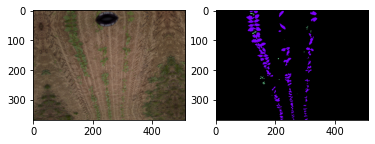

'\naugmented_img, target = next(iterator)\n\nrgb_img = cv2.imread(\'/content/Development_Dataset_15/training/images/Pead_mais_00070_i900.jpg\', cv2.IMREAD_UNCHANGED)  # open image\nproper_h = 384\nproper_w = 512\n    # resize to see how it works with kernels\n\n    # get exgreen\nexgr = None\nexgr_mask = None\nexgr = exgreen(rgb_img)\nprint("Exgr shape: ", exgr.shape)\n\nexgr_mask = thresh(exgr, 50)\n#exgr.resize([proper_h, proper_w, 3])\nim_gray_plt(exgr)\nim_gray_plt(exgr_mask)\n'

In [17]:
fig, ax = plt.subplots(1, 2)

augmented_img = augmented_img[0]   # First element
augmented_img = augmented_img  # denormalize

target = np.array(target[0, ..., 0])   # First element (squeezing channel dimension)

print(np.unique(target))

target_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(augmented_img))
ax[1].imshow(np.uint8(target_img))

plt.show()


'''
augmented_img, target = next(iterator)

rgb_img = cv2.imread('/content/Development_Dataset_15/training/images/Pead_mais_00070_i900.jpg', cv2.IMREAD_UNCHANGED)  # open image
proper_h = 384
proper_w = 512
    # resize to see how it works with kernels

    # get exgreen
exgr = None
exgr_mask = None
exgr = exgreen(rgb_img)
print("Exgr shape: ", exgr.shape)

exgr_mask = thresh(exgr, 50)
#exgr.resize([proper_h, proper_w, 3])
im_gray_plt(exgr)
im_gray_plt(exgr_mask)
'''

# Model setup

In [110]:
import keras
from keras.models import *
from keras.layers import *
from keras import layers
import keras.backend as K

In [111]:
#SEGNET_RESNET50

IMAGE_ORDERING = 'channels_last'


if IMAGE_ORDERING == 'channels_first':
    pretrained_url = "https://github.com/fchollet/deep-learning-models/" \
                     "releases/download/v0.2/" \
                     "resnet50_weights_th_dim_ordering_th_kernels_notop.h5"
elif IMAGE_ORDERING == 'channels_last':
    pretrained_url = "https://github.com/fchollet/deep-learning-models/" \
                     "releases/download/v0.2/" \
                     "resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"


def one_side_pad(x):
    x = ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING)(x)
    if IMAGE_ORDERING == 'channels_first':
        x = Lambda(lambda x: x[:, :, :-1, :-1])(x)
    elif IMAGE_ORDERING == 'channels_last':
        x = Lambda(lambda x: x[:, :-1, :-1, :])(x)
    return x


def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at
                     main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters

    if IMAGE_ORDERING == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), data_format=IMAGE_ORDERING,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, data_format=IMAGE_ORDERING,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), data_format=IMAGE_ORDERING,
               name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def conv_block(input_tensor, kernel_size, filters, stage, block,
               strides=(2, 2)):
    """conv_block is the block that has a conv layer at shortcut
    # Arguments
        input_tensor: input tensor
        kernel_size: defualt 3, the kernel size of middle conv layer at
                     main path
        filters: list of integers, the filterss of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    Note that from stage 3, the first conv layer at main path is with
    strides=(2,2) and the shortcut should have strides=(2,2) as well
    """
    filters1, filters2, filters3 = filters

    if IMAGE_ORDERING == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), data_format=IMAGE_ORDERING, strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, data_format=IMAGE_ORDERING,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), data_format=IMAGE_ORDERING,
               name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), data_format=IMAGE_ORDERING,
                      strides=strides, name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x


def get_resnet50_encoder(input_height=224,  input_width=224,
                         pretrained='imagenet',
                         include_top=True, weights='imagenet',
                         input_tensor=None, input_shape=None,
                         pooling=None,
                         classes=1000):

    assert input_height % 32 == 0
    assert input_width % 32 == 0

    if IMAGE_ORDERING == 'channels_first':
        img_input = Input(shape=(3, input_height, input_width))
    elif IMAGE_ORDERING == 'channels_last':
        img_input = Input(shape=(input_height, input_width, 3))

    if IMAGE_ORDERING == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    x = ZeroPadding2D((3, 3), data_format=IMAGE_ORDERING)(img_input)
    x = Conv2D(64, (7, 7), data_format=IMAGE_ORDERING,
               strides=(2, 2), name='conv1')(x)
    f1 = x

    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), data_format=IMAGE_ORDERING, strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')
    f2 = one_side_pad(x)

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')
    f3 = x

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')
    f4 = x

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
    f5 = x

    x = AveragePooling2D(
        (7, 7), data_format=IMAGE_ORDERING, name='avg_pool')(x)
    # f6 = x
    
    if pretrained == 'imagenet':
        weights_path = keras.utils.get_file(
            pretrained_url.split("/")[-1], pretrained_url)
        Model(img_input, x).load_weights(weights_path)
    
    return img_input, [f1, f2, f3, f4, f5]

def segnet_decoder(f, n_classes, n_up=3):

    assert n_up >= 2

    o = f
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(512, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(256, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    for _ in range(n_up-2):
        o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
        o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
        o = (Conv2D(128, (3, 3), padding='valid',
             data_format=IMAGE_ORDERING))(o)
        o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(64, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = Conv2D(n_classes, (3, 3), padding='same',
               data_format=IMAGE_ORDERING)(o)

    return o

def get_segmentation_model(input, output):

    img_input = input
    o = output

    o_shape = Model(img_input, o).output_shape
    i_shape = Model(img_input, o).input_shape

    if IMAGE_ORDERING == 'channels_first':
        output_height = o_shape[2]
        output_width = o_shape[3]
        input_height = i_shape[2]
        input_width = i_shape[3]
        n_classes = o_shape[1]
        o = (Reshape((-1, output_height*output_width)))(o)
        o = (Permute((2, 1)))(o)
    elif IMAGE_ORDERING == 'channels_last':
        output_height = o_shape[1]
        output_width = o_shape[2]
        input_height = i_shape[1]
        input_width = i_shape[2]
        n_classes = o_shape[3]
        o = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="nearest")(o)
        o = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation="nearest")(o)
    o = (Activation('softmax'))(o)
    model = Model(img_input, o)
    model.output_width = output_width
    model.output_height = output_height
    model.n_classes = n_classes
    model.input_height = input_height
    model.input_width = input_width
    model.model_name = ""
    return model

def _segnet(n_classes, encoder,  input_height=416, input_width=608,
            encoder_level=3):

    img_input, levels = encoder(
        input_height=input_height,  input_width=input_width)

    feat = levels[encoder_level]
    o = segnet_decoder(feat, n_classes, n_up=3)
    model = get_segmentation_model(img_input, o)

    return model


def resnet50_segnet(n_classes, input_height=416, input_width=608,
                    encoder_level=3):

    model = _segnet(n_classes, get_resnet50_encoder, input_height=input_height,
                    input_width=input_width, encoder_level=encoder_level)
    model.model_name = "resnet50_segnet"
  
    return model

In [112]:
#PSPNET_RESNET
def resnet(x, input_shape):
      
      # Decreases the dimensions of the input image by a factor of 32
      x = tf.keras.applications.ResNet50(include_top=False, weights=None,input_tensor=x ,input_shape=(128,128,3)).output

      # Upsampling by 4 so that we get an output feature map of size 1/8th of the initial image
      x = UpSampling2D(size = (4,4))(x)      
      
      return x
 
def pyramid_pooling_module(x):  

      layer1 = AveragePooling2D(pool_size=(1,1))(x)
      layer1 = Conv2D(filters=64,kernel_size=(1,1))(layer1)
      layer1 = BatchNormalization()(layer1)
      layer1 = UpSampling2D(size=1,interpolation='bilinear',name='red_layer')(layer1)

      layer2 = AveragePooling2D(pool_size=(2,2))(x)
      layer2 = Conv2D(filters=64,kernel_size=(1,1))(layer2)
      layer2 = BatchNormalization()(layer2)
      layer2 = UpSampling2D(size=2,interpolation='bilinear',name='orange_layer')(layer2)

      layer3 = AveragePooling2D(pool_size=(4,4))(x)
      layer3 = Conv2D(filters=64,kernel_size=(1,1))(layer3)
      layer3 = BatchNormalization()(layer3)
      layer3 = UpSampling2D(size=4,interpolation='bilinear',name='blue_layer')(layer3)

      layer4 = AveragePooling2D(pool_size=(8,8))(x)
      layer4 = Conv2D(filters=64,kernel_size=(1,1))(layer4)
      layer4 = BatchNormalization()(layer4)
      layer4 = UpSampling2D(size=8,interpolation='bilinear',name='green_layer')(layer4)

      concatenated = Concatenate()([x, layer1, layer2, layer3, layer4])

      return concatenated


def PSPNet(n_classes = 1, input_shape = (416,608, 3)):

      # Input to the model
      input = Input(input_shape)

      # resnet architecture
      X = resnet(input, input_shape)

      # pyramid pooling module
      ppm_output = pyramid_pooling_module(X)

      # final conv layers and output layer
      up1 = UpSampling2D(size=8)(ppm_output)
      cd1 = Conv2D(256, 3, activation = 'relu', padding='same')(up1)
      bn1 = BatchNormalization()(cd1)
      d1 = Dropout(0.5)(bn1)
      cd2 = Conv2D(256, 3, activation = 'relu', padding='same')(d1)
      bn2 = BatchNormalization()(cd2)
      d2 = Dropout(0.5)(bn2)
      cd3 = Conv2D(512, 3, activation = 'relu', padding='same')(d2)
      bn3 = BatchNormalization()(cd3)
      d3 = Dropout(0.5)(bn3)
      output = Conv2D(n_classes, 1, activation='sigmoid')(d3)

      roadModel = Model(inputs=input, outputs=output)


      return roadModel



 


In [113]:

if IMAGE_ORDERING == 'channels_first':
    MERGE_AXIS = 1
elif IMAGE_ORDERING == 'channels_last':
    MERGE_AXIS = -1

def resize_image(inp,  s, data_format):

    try:

        return Lambda(lambda x: K.resize_images(x,
                                                height_factor=s[0],
                                                width_factor=s[1],
                                                data_format=data_format,
                                                interpolation='bilinear'))(inp)

    except Exception as e:
        # if keras is old, then rely on the tf function
        # Sorry theano/cntk users!!!
        assert data_format == 'channels_last'
        assert IMAGE_ORDERING == 'channels_last'

        import tensorflow as tf

        return Lambda(
            lambda x: tf.image.resize_images(
                x, (K.int_shape(x)[1]*s[0], K.int_shape(x)[2]*s[1]))
        )(inp)


def pool_block(feats, pool_factor):

    if IMAGE_ORDERING == 'channels_first':
        h = K.int_shape(feats)[2]
        w = K.int_shape(feats)[3]
    elif IMAGE_ORDERING == 'channels_last':
        h = K.int_shape(feats)[1]
        w = K.int_shape(feats)[2]

    pool_size = strides = [
        int(np.round(float(h) / pool_factor)),
        int(np.round(float(w) / pool_factor))]

    x = AveragePooling2D(pool_size, data_format=IMAGE_ORDERING,
                         strides=strides, padding='same')(feats)
    x = Conv2D(512, (1, 1), data_format=IMAGE_ORDERING,
               padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = resize_image(x, strides, data_format=IMAGE_ORDERING)

    return x
def _pspnet(n_classes, encoder,  input_height=384, input_width=576):

    assert input_height % 192 == 0
    assert input_width % 192 == 0



    img_input, levels = encoder(
        input_height=input_height,  input_width=input_width)
    [f1, f2, f3, f4, f5] = levels

    img_input

    o = f5

    pool_factors = [1, 2, 3, 6]
    pool_outs = [o]

    for p in pool_factors:
        pooled = pool_block(o, p)
        pool_outs.append(pooled)

    o = Concatenate(axis=MERGE_AXIS)(pool_outs)

    o = Conv2D(512, (1, 1), data_format=IMAGE_ORDERING, use_bias=False)(o)
    o = BatchNormalization()(o)
    o = Activation('relu')(o)

    o = Conv2D(n_classes, (3, 3), data_format=IMAGE_ORDERING,
               padding='same')(o)
    o = resize_image(o, (8, 8), data_format=IMAGE_ORDERING)

    img_input,o
    model = get_segmentation_model(img_input, o)
    return model
def resnet50_pspnet(n_classes,  input_height=384, input_width=576):

    model = _pspnet(n_classes, get_resnet50_encoder,
                    input_height=input_height, input_width=input_width)
    model.model_name = "resnet50_pspnet"
    return model

In [114]:
num_classes = 3
img_h= int(384)
img_w = int(576)
model = resnet50_pspnet(num_classes,img_h,img_w)
model.summary()
  

Model: "functional_97"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 384, 576, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_28 (ZeroPadding2 (None, 390, 582, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 192, 288, 64) 9472        zero_padding2d_28[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 192, 288, 64) 256         conv1[0][0]                      
______________________________________________________________________________________

In [115]:
# Here we define the intersection over union for each class in the batch.
# Then we compute the final iou as the mean over classes
def meanIoU(y_true, y_pred):

  # get predicted class from softmax
  y_pred = tf.expand_dims(tf.argmax(y_pred, -1), -1)

  per_class_iou = []

  for i in range(1,3): # exclude the background class 0

    # Get prediction and target related to only a single class (i)
    class_pred = tf.cast(tf.where(y_pred == i, 1, 0), tf.float32)
    class_true = tf.cast(tf.where(y_true == i, 1, 0), tf.float32)
    intersection = tf.reduce_sum(class_true * class_pred)
    union = tf.reduce_sum(class_true) + tf.reduce_sum(class_pred) - intersection
    
    iou = (intersection + 1e-7) / (union + 1e-7)
    per_class_iou.append(iou)

  return tf.reduce_mean(per_class_iou)

In [116]:
# -----------------
# Compile the model
# -----------------
def compile_model(model,lr,loss_weights):

  # Optimization params
  # -------------------

  # Loss
  # ----
  # Sparse Categorical Crossentropy to use integers (mask) instead of one-hot encoded labels
  loss = tf.keras.losses.SparseCategoricalCrossentropy()
  # ----

  # Optimization function
  # ---------------------
  optimizer = tfa.optimizers.RectifiedAdam(learning_rate=lr) #tf.keras.optimizers.Adam(learning_rate=lr)
  # ---------------------

  # Validation metrics
  # ------------------
  mIoU = meanIoU
  metrics = ['accuracy', mIoU]
  # ------------------

  # Compile Model
  # -------------
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics,loss_weights=loss_weights)  
  # -------------

  # -------------------
  
  return model

In [117]:
# -----------------
# Set the callbacks
# -----------------
def set_callbacks(type, model_checkpoint, visualize_tensorboard, early_stop, reduce_lr_on_plateau):
  
  import os
  from datetime import datetime

  cwd = os.getcwd()

  exps_dir = os.path.join('/content/drive/My Drive/Challenge_2/', 'segmentation_experiments')
  if not os.path.exists(exps_dir):
    os.makedirs(exps_dir)

  model_name = type

  exp_dir = os.path.join(exps_dir, model_name)
  if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)
    
  callbacks = []

  # Model checkpoint
  # ----------------
  if model_checkpoint:
    ckpt_dir = os.path.join(exp_dir, 'ckpts')
    if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)

    ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp_{epoch:02d}.ckpt'), 
                                                       monitor = 'loss',
                                                       save_weights_only=True,
                                                       save_best_only=False)  # False to save the model directly
    callbacks.append(ckpt_callback)
  # ----------------

  # Visualize Learning on Tensorboard
  # ---------------------------------
  if visualize_tensorboard:
    tb_dir = os.path.join(exp_dir, 'tb_logs')
    if not os.path.exists(tb_dir):
      os.makedirs(tb_dir)
    
    # By default shows losses and metrics for both training and validation
    tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir,
                                                 profile_batch=0,
                                                 histogram_freq=1)  # if 1 shows weights histograms
    callbacks.append(tb_callback)
  # ---------------------------------

  # Early Stopping
  # --------------
  if early_stop:
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                   patience = 15,
                                                   restore_best_weights=True)
    callbacks.append(es_callback)
  # --------------

  # Reduce Learning rate on plateau
  # -------------------------------
  if reduce_lr_on_plateau:
    rlr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                        factor=0.5, 
                                                        patience=4, 
                                                        verbose=1, 
                                                        mode='auto', 
                                                        min_delta=0.0001)
    callbacks.append(rlr_callback)
  # -------------------------------

  return callbacks

In [118]:
# -----------
# Train model
# -----------
def train_model(model, train_dataset, dataset, valid_dataset, dataset_valid, callbacks, num_epochs, bs):
  
  history_model = model.fit(x = train_dataset,
                            epochs = num_epochs,  #### set repeat in training dataset
                            steps_per_epoch = int(np.ceil(len(dataset) / bs)),
                            validation_data = valid_dataset,
                            validation_steps = int(np.ceil(len(dataset_valid) / bs)), 
                            callbacks = callbacks)
  
  return history_model

# Training setup

In [121]:
# --------------------------------------
# Train the model with transfer learning
# --------------------------------------
def train_segnet():

  img_h= int(416*2)
  img_w = int(608*2)  
  apply_data_augmentation = True

  num_classes = 3

  bs = 3

  lr = 5e-4

  num_epochs = 100

  model_checkpoint = True
  visualize_tensorboard = False
  early_stop = False
  reduce_lr_on_plateau = True

  print('--------------------------------------------')
  print('Image heigth                      ---> ' + str(img_h))
  print('Image width                       ---> ' + str(img_w))
  print('Batch size                        ---> ' + str(bs))
  print('Learning rate                     ---> ' + str(lr))
  print('Number of epochs                  ---> ' + str(num_epochs))
  print('Model checkpoint                  ---> ' + str(model_checkpoint))
  print('Visualize tensorboars             ---> ' + str(visualize_tensorboard))
  print('Early stopping                    ---> ' + str(early_stop))
  print('Reduce learning rate on plateau   ---> ' + str(reduce_lr_on_plateau))
  print('--------------------------------------------')

  [img_data_gen, mask_data_gen] = data_generator(apply_data_augmentation)

  [train_dataset, dataset, valid_dataset, dataset_valid] = create_dataset(img_data_gen, mask_data_gen, img_h = img_h, img_w = img_w, bs = bs, num_classes = num_classes)

  model = resnet50_segnet(3,img_h,img_w, 3);
  model.summary()
  
  '''
  exps_dir = os.path.join('/content/drive/My Drive/Challenge_2/', 'segmentation_experiments')
  model_name = 'segnet_5'
  exp_dir = os.path.join(exps_dir, model_name)
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  latest = tf.train.latest_checkpoint(ckpt_dir)
  print(latest)
  model.load_weights(latest)
  '''
  
  weights = [1.5133127348818056, 14.139274748955497, 20.349217406952828]
  #weights = [0.029090525163313275, 0.5006609157489574, 1]  #to handle the unbalanced dataset
  model = compile_model(model, lr ,weights)



  callbacks = set_callbacks('segnet_6', model_checkpoint = model_checkpoint, visualize_tensorboard = visualize_tensorboard, early_stop = early_stop, reduce_lr_on_plateau = reduce_lr_on_plateau)

  history = train_model(model, train_dataset, dataset, valid_dataset, dataset_valid, callbacks, num_epochs = num_epochs, bs = bs)

  plot_history(history)

  return model, history

#[model, history] = train_segnet()

In [122]:
# --------------------------------------
# Train the model with transfer learning
# --------------------------------------
def train_pspnet():

  img_h= int(384*2)
  img_w = int(576*2)

  apply_data_augmentation = True

  num_classes = 3

  bs = 3

  lr = 5e-4

  num_epochs = 100

  model_checkpoint = True
  visualize_tensorboard = False
  early_stop = False
  reduce_lr_on_plateau = True

  print('--------------------------------------------')
  print('Image heigth                      ---> ' + str(img_h))
  print('Image width                       ---> ' + str(img_w))
  print('Batch size                        ---> ' + str(bs))
  print('Learning rate                     ---> ' + str(lr))
  print('Number of epochs                  ---> ' + str(num_epochs))
  print('Model checkpoint                  ---> ' + str(model_checkpoint))
  print('Visualize tensorboars             ---> ' + str(visualize_tensorboard))
  print('Early stopping                    ---> ' + str(early_stop))
  print('Reduce learning rate on plateau   ---> ' + str(reduce_lr_on_plateau))
  print('--------------------------------------------')

  [img_data_gen, mask_data_gen] = data_generator(apply_data_augmentation)

  [train_dataset, dataset, valid_dataset, dataset_valid] = create_dataset(img_data_gen, mask_data_gen, img_h = img_h, img_w = img_w, bs = bs, num_classes = num_classes)

  model = _pspnet(num_classes,get_resnet50_encoder,img_h,img_w)
  #model.summary()
  
  '''
  exps_dir = os.path.join('/content/drive/My Drive/Challenge_2/', 'segmentation_experiments')
  model_name = 'pspnet'
  exp_dir = os.path.join(exps_dir, model_name)
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  latest = tf.train.latest_checkpoint(ckpt_dir)
  print(latest)
  model.load_weights(latest)
  '''

  weights = [1.5133127348818056, 14.139274748955497, 20.349217406952828]
  model = compile_model(model, lr ,weights)

  callbacks = set_callbacks('pspnet', model_checkpoint = model_checkpoint, visualize_tensorboard = visualize_tensorboard, early_stop = early_stop, reduce_lr_on_plateau = reduce_lr_on_plateau)

  history = train_model(model, train_dataset, dataset, valid_dataset, dataset_valid, callbacks, num_epochs = num_epochs, bs = bs)

  plot_history(history)

  return model, history

# Plots

In [119]:
# ------------------------------------------------------------------------------
# Plot the history of the trained model (loss, val_loss; accuracy, val_accuracy)
# ------------------------------------------------------------------------------
def plot_history(history):
  from matplotlib import pyplot

  pyplot.figure()
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()

  pyplot.figure()
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.show() 

#Training Segnet

In [83]:
[model, history] = train_segnet()

--------------------------------------------
Image heigth                      ---> 832
Image width                       ---> 1216
Batch size                        ---> 3
Learning rate                     ---> 0.0005
Number of epochs                  ---> 100
Model checkpoint                  ---> True
Visualize tensorboars             ---> False
Early stopping                    ---> True
Reduce learning rate on plateau   ---> True
--------------------------------------------
Model: "functional_41"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 832, 1216, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_10 (ZeroPadding2 (None, 838, 1222, 3) 0           input_6[0][0]                   

KeyboardInterrupt: ignored

#Training Pspnet

In [ ]:
[model, history] = train_pspnet()

--------------------------------------------
Image heigth                      ---> 768
Image width                       ---> 1152
Batch size                        ---> 3
Learning rate                     ---> 0.0005
Number of epochs                  ---> 100
Model checkpoint                  ---> True
Visualize tensorboars             ---> False
Early stopping                    ---> False
Reduce learning rate on plateau   ---> True
--------------------------------------------
Epoch 1/100
203/203 [==============================] - ETA: 0s - loss: 0.3023 - accuracy: 0.9276 - meanIoU: 0.3083

# Compute prediction

In [43]:
'''
img_h= 416
img_w = 608

apply_data_augmentation = True

num_classes = 3

bs = 10


[img_data_gen, mask_data_gen] = data_generator(apply_data_augmentation)

[train_dataset, dataset, valid_dataset, dataset_valid] = create_dataset(img_data_gen, mask_data_gen, img_h = img_h, img_w = img_w, bs = bs, num_classes = num_classes)

model = resnet50_segnet(3, 416, 608, 3);
model.summary()



exps_dir = os.path.join('/content/drive/My Drive/Challenge_2/', 'segmentation_experiments')
model_name = 'segnet_2'
exp_dir = os.path.join(exps_dir, model_name)
ckpt_dir = os.path.join(exp_dir, 'ckpts')
latest = tf.train.latest_checkpoint(ckpt_dir)
print(latest)
model.load_weights(latest)
'''

"\nimg_h= 416\nimg_w = 608\n\napply_data_augmentation = True\n\nnum_classes = 3\n\nbs = 10\n\n\n[img_data_gen, mask_data_gen] = data_generator(apply_data_augmentation)\n\n[train_dataset, dataset, valid_dataset, dataset_valid] = create_dataset(img_data_gen, mask_data_gen, img_h = img_h, img_w = img_w, bs = bs, num_classes = num_classes)\n\nmodel = resnet50_segnet(3, 416, 608, 3);\nmodel.summary()\n\n\n\nexps_dir = os.path.join('/content/drive/My Drive/Challenge_2/', 'segmentation_experiments')\nmodel_name = 'segnet_2'\nexp_dir = os.path.join(exps_dir, model_name)\nckpt_dir = os.path.join(exp_dir, 'ckpts')\nlatest = tf.train.latest_checkpoint(ckpt_dir)\nprint(latest)\nmodel.load_weights(latest)\n"

In [44]:
import time
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

iterator = iter(valid_dataset)

In [45]:
image, target = next(iterator)

(1, 368, 512, 3)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(368, 512), dtype=int64, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>>

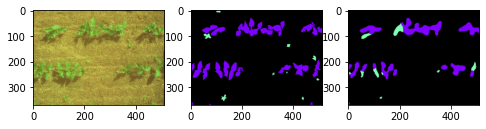

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(8, 8))
fig.show()

image = image[0]
target = target[0, ..., 0]

out_sigmoid = model.predict(x=tf.expand_dims(image, 0))

# Get predicted class as the index corresponding to the maximum value in the vector probability
# predicted_class = tf.cast(out_sigmoid > score_th, tf.int32)
# predicted_class = predicted_class[0, ..., 0]
predicted_class = tf.argmax(out_sigmoid, -1)

out_sigmoid.shape
print()

predicted_class = predicted_class[0, ...]

predicted_class.numpy

# Assign colors (just for visualization)
target_img = np.zeros([target.shape[0], target.shape[1], 3])
prediction_img = np.zeros([target.shape[0], target.shape[1], 3])

target_img[np.where(target == 0)] = [0, 0, 0]
for i in range(1, 3):
  target_img[np.where(target == i)] = np.array(colors[i-1])[:3] * 255

prediction_img[np.where(predicted_class == 0)] = [0, 0, 0]
for i in range(1, 3):
  prediction_img[np.where(predicted_class == i)] = np.array(colors[i-1])[:3] * 255

ax[0].imshow(np.uint8(image))
ax[1].imshow(np.uint8(target_img))
ax[2].imshow(np.uint8(prediction_img))

fig.canvas.draw()
time.sleep(1)

# Result csv

In [47]:
# Create prediction.json

! unzip '/content/drive/My Drive/Challenge_2/Development_Dataset.zip'

def rle_encode(img):
  '''
  img: numpy array, 1 - foreground, 0 - background
  Returns run length as string formatted
  '''
  pixels = img.flatten()
  pixels = np.concatenate([[0], pixels, [0]])
  runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
  runs[1::2] -= runs[::2]
  
  return ' '.join(str(x) for x in runs)

import os
import json
import numpy as np
from PIL import Image

    # The submission file will be a zip file containing the a
    # submission.json file.

    # It must have the following structure:

    # - image name (without any extension, e.g., png, jpg, etc.)
    #   - shape: shape of the original image as list [Height, Width]
    #   - team: team of the original image. One in {'Bipbip', 'Pead', 'Roseau', 'Weedelec'}
    #   - crop: crop of the original image. One in {'Haricot', 'Mais'}
    #   - segmentation: prediction (as a dict)
    #     - crop: RLE encoded crop segmentation (no weed)
    #     - weed: RLE encoded weed segmentation (no crop)

    # Please refer to the folder structure of the given dataset to fill
    # the team and crop keys.

teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
plants = ['Haricot', 'Mais']

submission_dict = {}

for t in teams:
  for p in plants:

    tmp_path = '/content/Development_Dataset/Test_Dev/' + t + '/' + p + '/' + 'Images'
    
    image_filenames = os.listdir(tmp_path)

    for img_name in image_filenames:
      
      tmp_path = '/content/Development_Dataset/Test_Dev/' + t + '/' + p + '/' + 'Images'
      tmp_path = os.path.join(tmp_path, img_name)
      img = Image.open(tmp_path).convert('RGB')

      img_name = img_name.split('.')[0]

      submission_dict[img_name] = {}
      submission_dict[img_name]['shape'] = [img.height, img.width]
      submission_dict[img_name]['team'] = t
      submission_dict[img_name]['crop'] = p
      submission_dict[img_name]['segmentation'] = {}

      # Resize image for the network
      w, h = img.size
      img = img.resize((608, 416)) #size – The requested size in pixels, as a 2-tuple: (width, height). !!!!!!!!!!! ATTENTION !!!!!!!!! PIL 

      # Getting the np array with the batch dimension
      img_array = np.array(img)
      img_array = np.expand_dims(img_array, 0) # insert batch dimension

      # Data Normalization !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!111----------------------------------------------
      img_array = img_array

      # Prediction from the model
      out = model.predict(x=img_array)
      
      # Resize of the output
      out = tf.image.resize(out, size=[h, w], method = 'nearest').numpy()

      # Getting the numpy array with prediction
      mask_arr = tf.argmax(out, -1)
      mask_arr = mask_arr.numpy()
      
      # RLE encoding
      # crop
      rle_encoded_crop = rle_encode(mask_arr == 1)
      # weed
      rle_encoded_weed = rle_encode(mask_arr == 2)

      submission_dict[img_name]['segmentation']['crop'] = rle_encoded_crop
      submission_dict[img_name]['segmentation']['weed'] = rle_encoded_weed
      

# Finally, save the results into the submission.json file
with open('/content/submission.json', 'w') as f:
  json.dump(submission_dict, f)

! mkdir '/content/drive/My Drive/Challenge_2/submission'
! cp '/content/submission.json' '/content/drive/My Drive/Challenge_2/submission/submission.json' 

Archive:  /content/drive/My Drive/Challenge_2/Development_Dataset.zip
replace Development_Dataset/LICENSE.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Development_Dataset/LICENSE.txt  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00211.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00581.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00721.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_00951.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_01341.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_02421.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_02781.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/Haricot/Images/Bipbip_haricot_im_02841.jpg  
  inflating: Development_Dataset/Test_Dev/Bipbip/H

In [48]:
! ls '/content/drive/My Drive/Challenge_2/submission'

submission.json


# Find class weights

In [ ]:
! unzip '/content/drive/My Drive/Challenge_2/Development_Dataset.zip'

In [ ]:
# -----------------------------------------------
teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
plants = ['Haricot', 'Mais']

for t in teams:
  t
  weights = [0, 0, 0]
  values = [0, 0, 0]
  for p in plants:

    tmp_path = '/content/Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks'
    image_filenames = os.listdir(tmp_path)

    for img_name in image_filenames:

      tmp_path = '/content/Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks'
      tmp_path = os.path.join(tmp_path, str(img_name))
      
      mask = Image.open(tmp_path).convert('RGB')

      mask_arr = np.array(mask)
    
      # RGB to target
      # -------------
      new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

      # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
      new_mask_arr[np.where(np.all(mask_arr == [0, 0, 0], axis=-1))] = 0
      new_mask_arr[np.where(np.all(mask_arr == [254, 124, 18], axis=-1))] = 0
      new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1
      new_mask_arr[np.where(np.all(mask_arr == [216, 67, 82], axis=-1))] = 2

      mask_arr = np.expand_dims(new_mask_arr, -1)
      mask_arr = mask_arr.flatten()

      for i in mask_arr:
        if i == 0:                         # Background
          values[0] = values[0] + 1
        elif i == 1:                        # Crop
          values[1] = values[1] + 1
        else:                               # Weed
          values[2] = values[2] + 1
  min = np.min(values) 
  index_min = np.argmin(values)

  for x in range(len(values)):
        weights[x] = min / values[x]
  weights

#[0.029090525163313275, 0.5006609157489574, 1]
#Bipbip[0.052693349267552966, 0.5649861716498282, 1.0]Pead[0.018935944310845283, 0.45819082431063257, 1.0]Roseau[0.03518956387652443, 0.5805580049255057, 1.0]Weedelec[0.029517099223600237, 0.4930095437033827, 1.0]

'Bipbip'

[0.052693349267552966, 0.5649861716498282, 1.0]

'Pead'

[0.018935944310845283, 0.45819082431063257, 1.0]

'Roseau'

[0.03518956387652443, 0.5805580049255057, 1.0]

'Weedelec'

[0.029517099223600237, 0.4930095437033827, 1.0]

In [ ]:
'''
# -----------------------------------------------
teams = ['Bipbip', 'Pead', 'Roseau', 'Weedelec']
plants = ['Haricot', 'Mais']

values = [0, 0, 0]
tot = 0

for t in teams:
  for p in plants:

    tmp_path = '/content/Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks'
    image_filenames = os.listdir(tmp_path)

    for img_name in image_filenames:

      tmp_path = '/content/Development_Dataset/Training/' + t + '/' + p + '/' + 'Masks'
      tmp_path = os.path.join(tmp_path, str(img_name))
      
      mask = Image.open(tmp_path).convert('RGB')

      mask_arr = np.array(mask)
    
      # RGB to target
      # -------------
      new_mask_arr = np.zeros(mask_arr.shape[:2], dtype=mask_arr.dtype)

      # Use RGB dictionary in 'RGBtoTarget.txt' to convert RGB to target
      new_mask_arr[np.where(np.all(mask_arr == [0, 0, 0], axis=-1))] = 0
      new_mask_arr[np.where(np.all(mask_arr == [254, 124, 18], axis=-1))] = 0
      new_mask_arr[np.where(np.all(mask_arr == [255, 255, 255], axis=-1))] = 1
      new_mask_arr[np.where(np.all(mask_arr == [216, 67, 82], axis=-1))] = 2

      mask_arr = np.expand_dims(new_mask_arr, -1)
      mask_arr = mask_arr.flatten()

      for i in mask_arr:
        tot = tot + 1
        if i == 0:                         # Background
          values[0] = values[0] + 1
        elif i == 1:                        # Crop
          values[1] = values[1] + 1
        else:                               # Weed
          values[2] = values[2] + 1

weights = [0, 0, 0]

min = np.min(values) 
index_min = np.argmin(values)

for x in range(len(values)):
  if not x == index_min:
      weights[x] = min / values[x]
  else:
      weights[x] = 1

weights
'''